In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_liga = pd.read_csv('data/1-bundesliga.csv')
df_ere= pd.read_csv('data/eredivisie.csv')
df_nos = pd.read_csv('data/liga-nos.csv')
df_flc = pd.read_csv('data/ligue-1.csv')
df_epc = pd.read_csv('data/premier-league.csv')
df_slp = pd.read_csv('data/primera-division.csv')
df_ISA = pd.read_csv('data/serie-a.csv')

df = pd.concat([df_liga, df_ere, df_nos, df_flc, \
                df_epc, df_slp, df_ISA], ignore_index=True)

df.to_csv("data/Base_Data.csv")

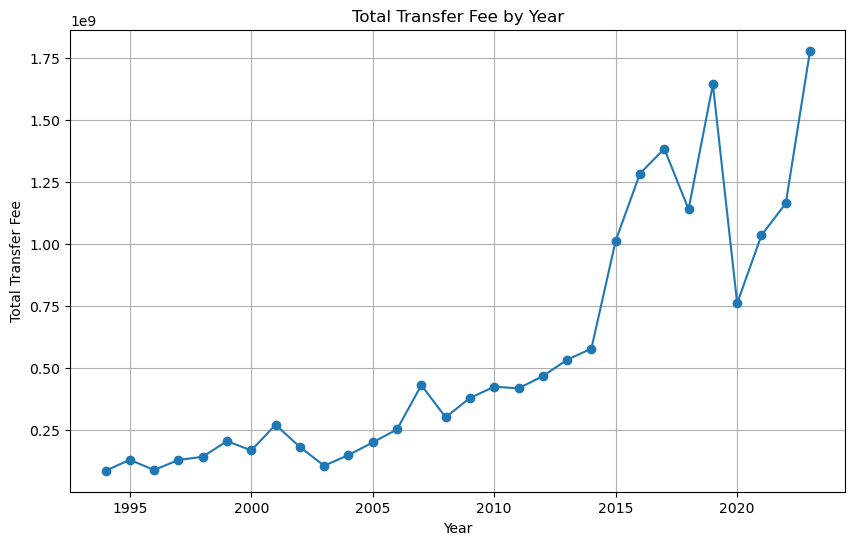

In [3]:
df_liga = pd.read_csv('data/1-bundesliga.csv')
df_liga.dropna(subset=['Fee'], inplace=True)
df_liga = df_liga[df_liga['Fee'].str.contains("€")]
df_liga['Fee'] = df_liga['Fee'].str.replace('€', '')\
.str.replace('Loan fee: ', '')\
.str.replace('m', 'e6')\
.str.replace('k', 'e3')\
.str.replace(',', '')\
.astype(float)
total_transfer_fee_by_year = df_liga.groupby('Year')['Fee'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_transfer_fee_by_year.index, total_transfer_fee_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Transfer Fee')
plt.title('Total Transfer Fee by Year')
plt.grid(True)
plt.show()

In [4]:
df = pd.read_csv('data/Base_Data.csv')

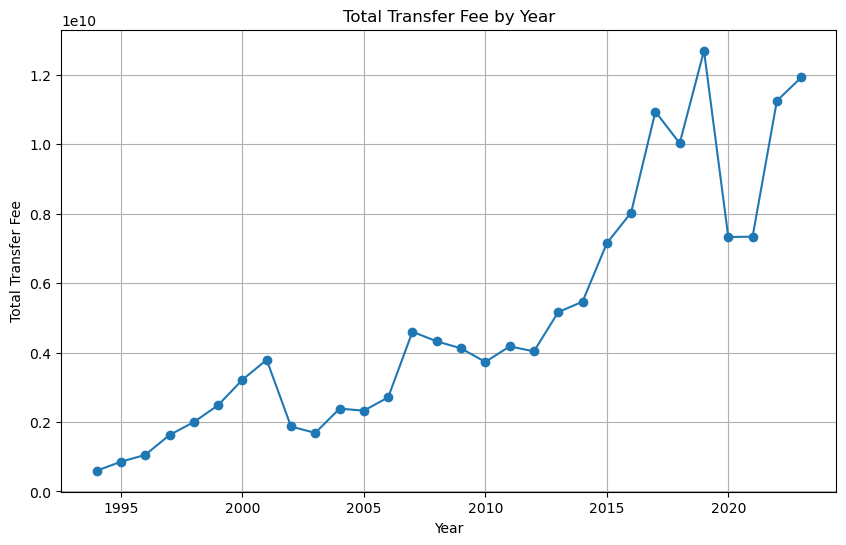

In [5]:
df.dropna(subset=['Fee'], inplace=True)
df = df[df['Fee'].str.contains("€")]
df['Fee'] = df['Fee'].str.replace('€', '')\
.str.replace('Loan fee: ', '')\
.str.replace('m', 'e6')\
.str.replace('k', 'e3')\
.str.replace(',', '')\
.astype(float)
total_transfer_fee_by_year = df.groupby('Year')['Fee'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_transfer_fee_by_year.index, total_transfer_fee_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Transfer Fee')
plt.title('Total Transfer Fee by Year')
plt.grid(True)
plt.show()

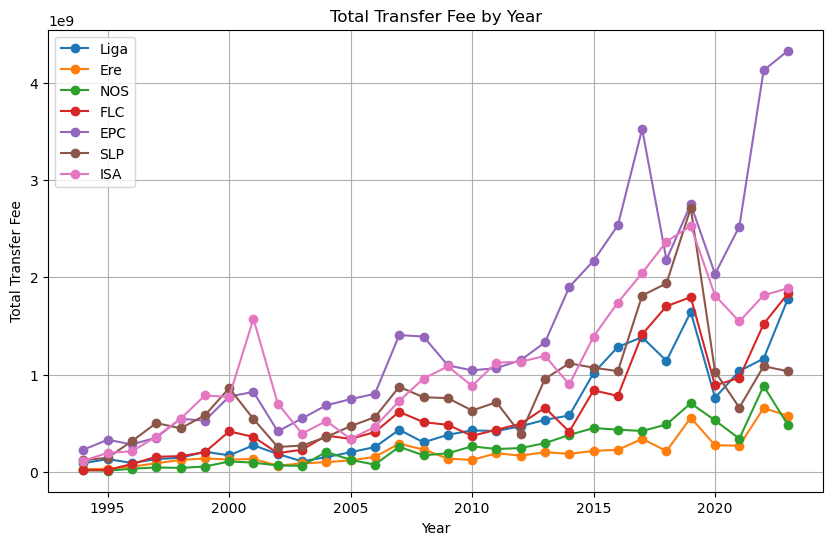

In [6]:
df = pd.read_csv('data/Base_Data.csv')
df.dropna(subset=['Fee'], inplace=True)
df = df[df['Fee'].str.contains("€")]
df['Fee'] = df['Fee'].str.replace('€', '')\
.str.replace('Loan fee: ', '')\
.str.replace('m', 'e6')\
.str.replace('k', 'e3')\
.str.replace(',', '')\
.astype(float)
plt.figure(figsize=(10, 6))
total_transfer_fee_by_year = df[df['League Name'] == '1-bundesliga']\
    .groupby('Year')['Fee'].sum()
plt.plot(total_transfer_fee_by_year.index,\
         total_transfer_fee_by_year.values, marker='o', label = 'Liga')

total_transfer_fee_by_year = df[df['League Name'] == 'eredivisie']\
    .groupby('Year')['Fee'].sum()
plt.plot(total_transfer_fee_by_year.index,\
         total_transfer_fee_by_year.values, marker='o', label = 'Ere')

total_transfer_fee_by_year = df[df['League Name'] == 'liga-nos']\
    .groupby('Year')['Fee'].sum()
plt.plot(total_transfer_fee_by_year.index,\
         total_transfer_fee_by_year.values, marker='o', label = 'NOS')

total_transfer_fee_by_year = df[df['League Name'] == 'ligue-1']\
    .groupby('Year')['Fee'].sum()
plt.plot(total_transfer_fee_by_year.index,\
         total_transfer_fee_by_year.values, marker='o', label = 'FLC')

total_transfer_fee_by_year = df[df['League Name'] == 'premier-league']\
    .groupby('Year')['Fee'].sum()
plt.plot(total_transfer_fee_by_year.index,\
         total_transfer_fee_by_year.values, marker='o', label = 'EPC')

total_transfer_fee_by_year = df[df['League Name'] == 'primera-division']\
    .groupby('Year')['Fee'].sum()
plt.plot(total_transfer_fee_by_year.index,\
         total_transfer_fee_by_year.values, marker='o', label = 'SLP')

total_transfer_fee_by_year = df[df['League Name'] == 'serie-a']\
    .groupby('Year')['Fee'].sum()
plt.plot(total_transfer_fee_by_year.index,\
         total_transfer_fee_by_year.values, marker='o', label = 'ISA')


plt.xlabel('Year')
plt.ylabel('Total Transfer Fee')
plt.title('Total Transfer Fee by Year')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df_in = df[df['Transfer Movement'] == 'In']

In [59]:
# 按照俱乐部分组，计算每个俱乐部的总转会费
club_total_fee = df_in.groupby('Club')['Fee'].sum()

# 选取总转会费前30的俱乐部
top_30_clubs_by_fee = club_total_fee.nlargest(30)

df_top = df_in[df_in['Club'].isin(top_30_clubs_by_fee.index) \
            & df_in['Club Involved'].isin(top_30_clubs_by_fee.index)]

In [43]:
all_clubs = df_in['Club'].unique()
df_top = df_in[df_in['Club'].isin(all_clubs) & df_in['Club Involved'].isin(all_clubs)]

<Figure size 6000x6000 with 0 Axes>

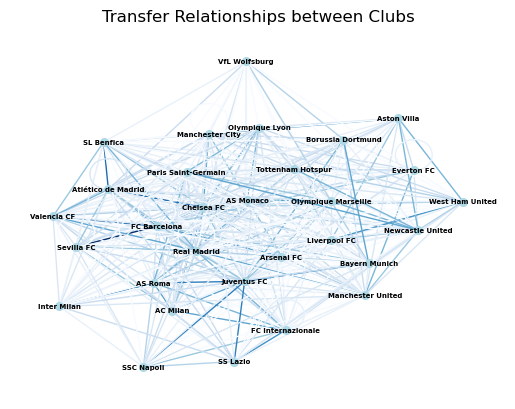

In [60]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 示例数据
data = {
    'club': df_top['Club'],
    'club_involved': df_top['Club Involved']
}

# 创建DataFrame
df_network = pd.DataFrame(data)

# 统计转会次数
transfer_counts = df_network.groupby(['club', 'club_involved']).size().reset_index(name='counts')

# 取转会次数前50的俱乐部及其边
top_50_transfers = transfer_counts\
#.nlargest(400, 'counts')

# 创建有向图
G = nx.Graph()

# 添加边，表示转会关系，边的颜色深浅表示转会次数
for idx, row in top_50_transfers.iterrows():
    if not G.has_edge(row['club'], row['club_involved']):
        G.add_edge(row['club'], row['club_involved'], weight=row['counts'])
    else:
        G[row['club']][row['club_involved']]['weight'] += row['counts']

# 获取边的权重
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# 绘制网络图
pos = nx.spring_layout(G)  # 选择布局方式，这里选择Spring layout
plt.figure(figsize=(60, 60))
fig, ax = plt.subplots()  # 创建图和轴对象
nx.draw(G, pos, with_labels=True, node_size=30, \
        node_color='lightblue', font_size=5, \
        font_weight='bold', width=1, edge_color=edge_weights, \
        edge_cmap=plt.cm.Blues, ax=ax)
ax.set_title('Transfer Relationships between Clubs')
plt.show()


In [52]:
league_id = {'1-bundesliga': 0,'eredivisie': 1,'liga-nos': 2,
             'ligue-1': 3,'premier-league': 4,'primera-division': 5,'serie-a': 6}
club_league = {}
for idx, row in df_in.iterrows():
    club_league[row['Club']] = league_id[row['League Name']]
club_league

{'Karlsruher SC': 0,
 'SG Dynamo Dresden': 0,
 'Bayer 05 Uerdingen': 0,
 'SV Werder Bremen': 0,
 'VfL Bochum': 0,
 'VfB Stuttgart': 0,
 'TSV 1860 Munich': 0,
 'SC Freiburg': 0,
 'MSV Duisburg': 0,
 '1.FC Kaiserslautern': 0,
 'Hamburger SV': 0,
 'FC Schalke 04': 0,
 'Bayern Munich': 0,
 'Eintracht Frankfurt': 0,
 'Borussia Mönchengladbach': 0,
 'Borussia Dortmund': 0,
 'Bayer 04 Leverkusen': 0,
 '1.FC Köln': 0,
 'FC St. Pauli': 0,
 'KFC Uerdingen 05': 0,
 'FC Hansa Rostock': 0,
 'Fortuna Düsseldorf': 0,
 'Arminia Bielefeld': 0,
 'VfL Wolfsburg': 0,
 'Hertha BSC': 0,
 '1.FC Nuremberg': 0,
 'SpVgg Unterhaching': 0,
 'SSV Ulm 1846': 0,
 'FC Energie Cottbus': 0,
 'Hannover 96': 0,
 '1.FSV Mainz 05': 0,
 'Alemannia Aachen': 0,
 'TSG 1899 Hoffenheim': 0,
 'FC Augsburg': 0,
 'SpVgg Greuther Fürth': 0,
 'Eintracht Braunschweig': 0,
 'SC Paderborn 07': 0,
 'FC Ingolstadt 04': 0,
 'SV Darmstadt 98': 0,
 'RB Leipzig': 0,
 '1.FC Union Berlin': 0,
 '1.FC Heidenheim 1846': 0,
 'Ajax Amsterdam': 1,
 '

In [61]:
nx.set_node_attributes(G, club_league, name='group')

In [62]:
from networkx.readwrite import json_graph
import json
js = json_graph.node_link_data(G)
json.dump(js, open('transfer_network_top30.json', 'w'))

In [8]:
df = pd.read_csv('data/Base_Data.csv')
df.dropna(subset=['Fee'], inplace=True)
df = df[df['Fee'].str.contains("€")]
df['Fee'] = df['Fee'].str.replace('€', '')\
.str.replace('Loan fee: ', '')\
.str.replace('m', 'e6')\
.str.replace('k', 'e3')\
.str.replace(',', '')\
.astype(float)

df_pos = df.groupby('Pos').agg({
    'Fee': 'mean',
    'Pos': 'count'
}).rename(columns={'Pos': 'Count'})

# 打印生成的 df_pos
df_pos


,Fee,Count
Pos,,
AM,5.810893e+06,2013
Attack,5.419524e+05,42
CB,4.616542e+06,5027
CF,5.900708e+06,6260
CM,5.790891e+06,2976
DM,5.226038e+06,2611
Defence,7.147778e+05,18
GK,3.476930e+06,1603
LB,3.966461e+06,1811


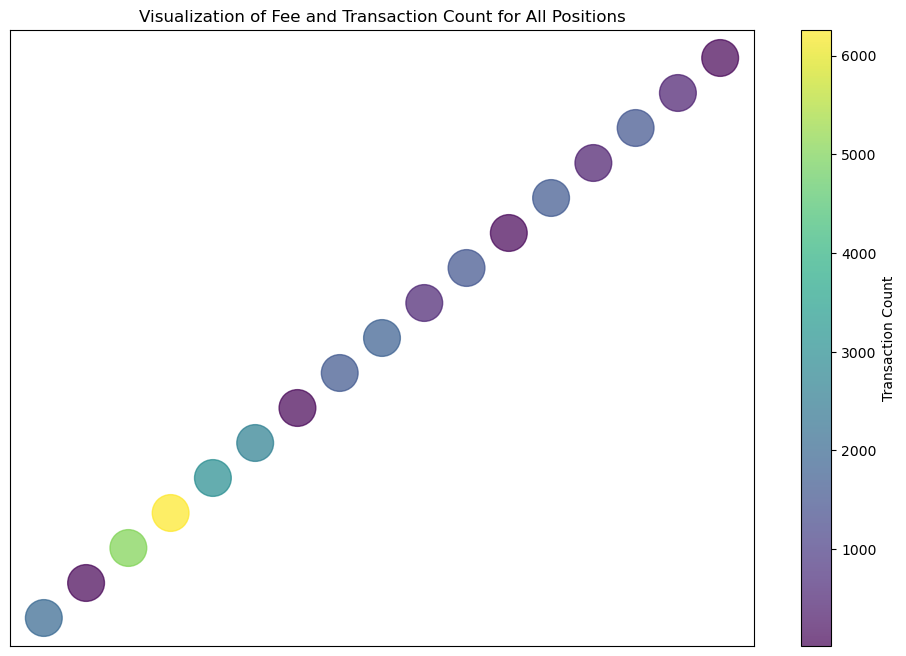

In [9]:
import matplotlib.pyplot as plt

# 获取所有位置的平均Fee和交易次数
average_fee_all = df_pos['Fee']
transaction_count_all = df_pos['Count']

# 准备数据
sizes = average_fee_all.values
colors = transaction_count_all.values

# 画图
plt.figure(figsize=(12, 8))
plt.scatter(range(len(df_pos)), range(len(df_pos)), c=colors, cmap='viridis', alpha=0.7, s = 700)

# 添加颜色条
plt.colorbar(label='Transaction Count')

# 隐藏坐标轴
plt.xticks([])
plt.yticks([])

# 添加标签和标题
plt.title('Visualization of Fee and Transaction Count for All Positions')

plt.show()



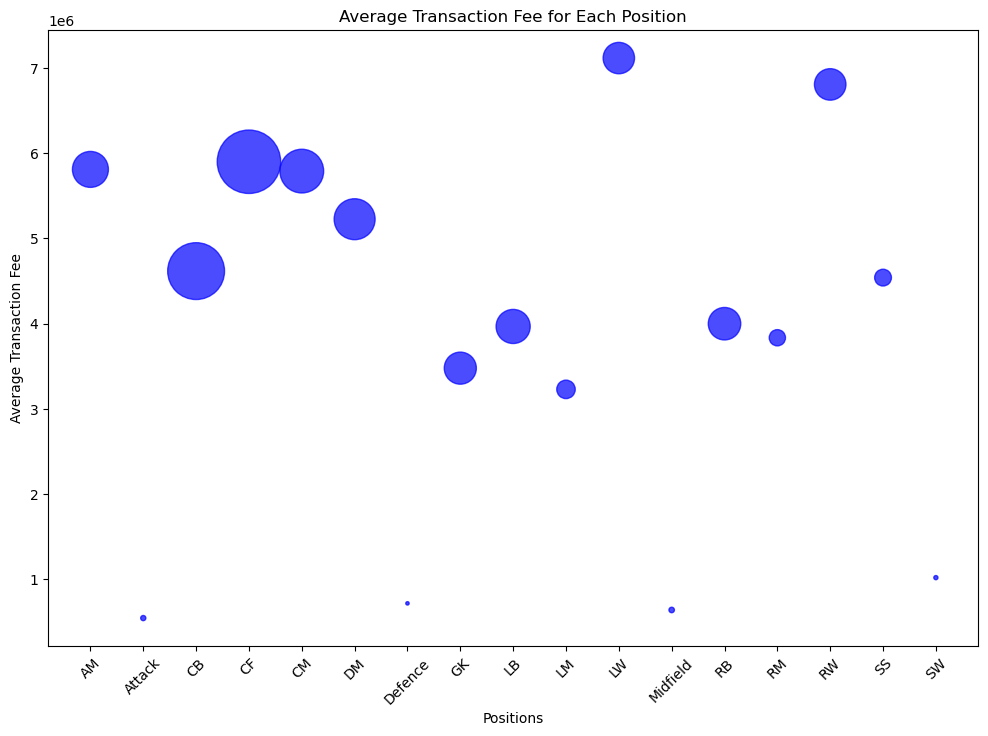

In [9]:
import matplotlib.pyplot as plt

# 获取所有位置的平均Fee
average_fee_all = df_pos['Fee']

# 准备数据
positions = df_pos.index
prices = average_fee_all.values

# 画图
plt.figure(figsize=(12, 8))
plt.scatter(positions, prices, c='blue', alpha=0.7, s = df_pos['Count']/3)

# 添加标签和标题
plt.xlabel('Positions')
plt.ylabel('Average Transaction Fee')
plt.title('Average Transaction Fee for Each Position')

# 旋转x轴标签以避免重叠
plt.xticks(rotation=45)

plt.show()


In [8]:
df = pd.read_csv('data/Base_Data.csv')
df.dropna(subset=['Fee'], inplace=True)
df = df[df['Fee'].str.contains("€")]
df['Fee'] = df['Fee'].str.replace('€', '')\
.str.replace('Loan fee: ', '')\
.str.replace('m', 'e6')\
.str.replace('k', 'e3')\
.str.replace(',', '')\
.astype(float)

In [9]:
# get the matrix for overall transfers between nation

# get the league for each club

df_league = df[['Club', 'League Name']]

df_league = df_league.drop_duplicates()

df_merged = pd.merge(df, df_league, left_on='Club Involved', right_on = 'Club',how='left')
not_equal_condition = df_merged['League Name_x'] != df_merged['League Name_y']
df_tranfer_league = df_merged[not_equal_condition]
df_tranfer_league.dropna(subset=['League Name_x', 'League Name_y'], inplace=True)

df_tranfer_league

/var/folders/0b/98y7p9350vbcccqghwxpkb800000gn/T/ipykernel_8553/1979485725.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tranfer_league.dropna(subset=['League Name_x', 'League Name_y'], inplace=True)


,Unnamed: 0,Club_x,Player,Age,Pos,Club Involved,Fee,Transfer Movement,League Name_x,Year,Club_y,League Name_y
0,0,Karlsruher SC,Thomas Häßler,28,AM,AS Roma,3700000.0,In,1-bundesliga,1994,AS Roma,serie-a
10,18,SG Dynamo Dresden,Johnny Ekström,29,CF,AC Reggiana,600000.0,In,1-bundesliga,1994,AC Reggiana,serie-a
34,78,VfB Stuttgart,Giovane Élber,21,CF,Milan AC,1600000.0,In,1-bundesliga,1994,Milan AC,serie-a
64,144,MSV Duisburg,Emmanuel Amunike,23,LW,Sporting CP,1750000.0,Out,1-bundesliga,1994,Sporting CP,liga-nos
89,211,Bayern Munich,Jean-Pierre Papin,30,CF,Milan AC,2750000.0,In,1-bundesliga,1994,Milan AC,serie-a
...,...,...,...,...,...,...,...,...,...,...,...,...
28502,113475,Hellas Verona,Ondrej Duda,28,AM,1.FC Köln,2700000.0,In,serie-a,2023,1.FC Köln,1-bundesliga
28519,113577,Genoa CFC,Josep Martínez,25,GK,RB Leipzig,3500000.0,In,serie-a,2023,RB Leipzig,1-bundesliga
28520,113578,Genoa CFC,George Puscas,27,CF,Reading FC,3000000.0,In,serie-a,2023,Reading FC,premier-league
28528,113631,Cagliari Calcio,Mateusz Wieteska,26,CB,Clermont Foot 63,5000000.0,In,serie-a,2023,Clermont Foot 63,ligue-1


In [10]:
transfers_in = df_tranfer_league[df_tranfer_league['Transfer Movement'] == 'Out']


leagues = df_tranfer_league['League Name_x'].unique()


transfer_matrix = pd.DataFrame(np.zeros((len(leagues), len(leagues))), index=leagues, columns=leagues)

for _, transfer in transfers_in.iterrows():
    from_league = transfer['League Name_x']
    to_league = transfer['League Name_y']
    transfer_matrix.at[from_league, to_league] += 1


transfer_matrix

,1-bundesliga,eredivisie,liga-nos,ligue-1,premier-league,primera-division,serie-a
1-bundesliga,0.0,45.0,11.0,55.0,164.0,78.0,82.0
eredivisie,103.0,0.0,14.0,35.0,153.0,50.0,60.0
liga-nos,40.0,9.0,0.0,73.0,107.0,130.0,49.0
ligue-1,101.0,10.0,25.0,0.0,263.0,106.0,111.0
premier-league,102.0,26.0,28.0,77.0,0.0,122.0,151.0
primera-division,71.0,15.0,53.0,70.0,197.0,0.0,156.0
serie-a,101.0,19.0,33.0,86.0,180.0,153.0,0.0
